In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, models, layers

In [41]:
fm = datasets.fashion_mnist

In [42]:
(X_train, y_train),(X_test, y_test) = fm.load_data()

In [43]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [44]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [45]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [46]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [47]:
X_train = X_train/255.0
X_test = X_test/255.0

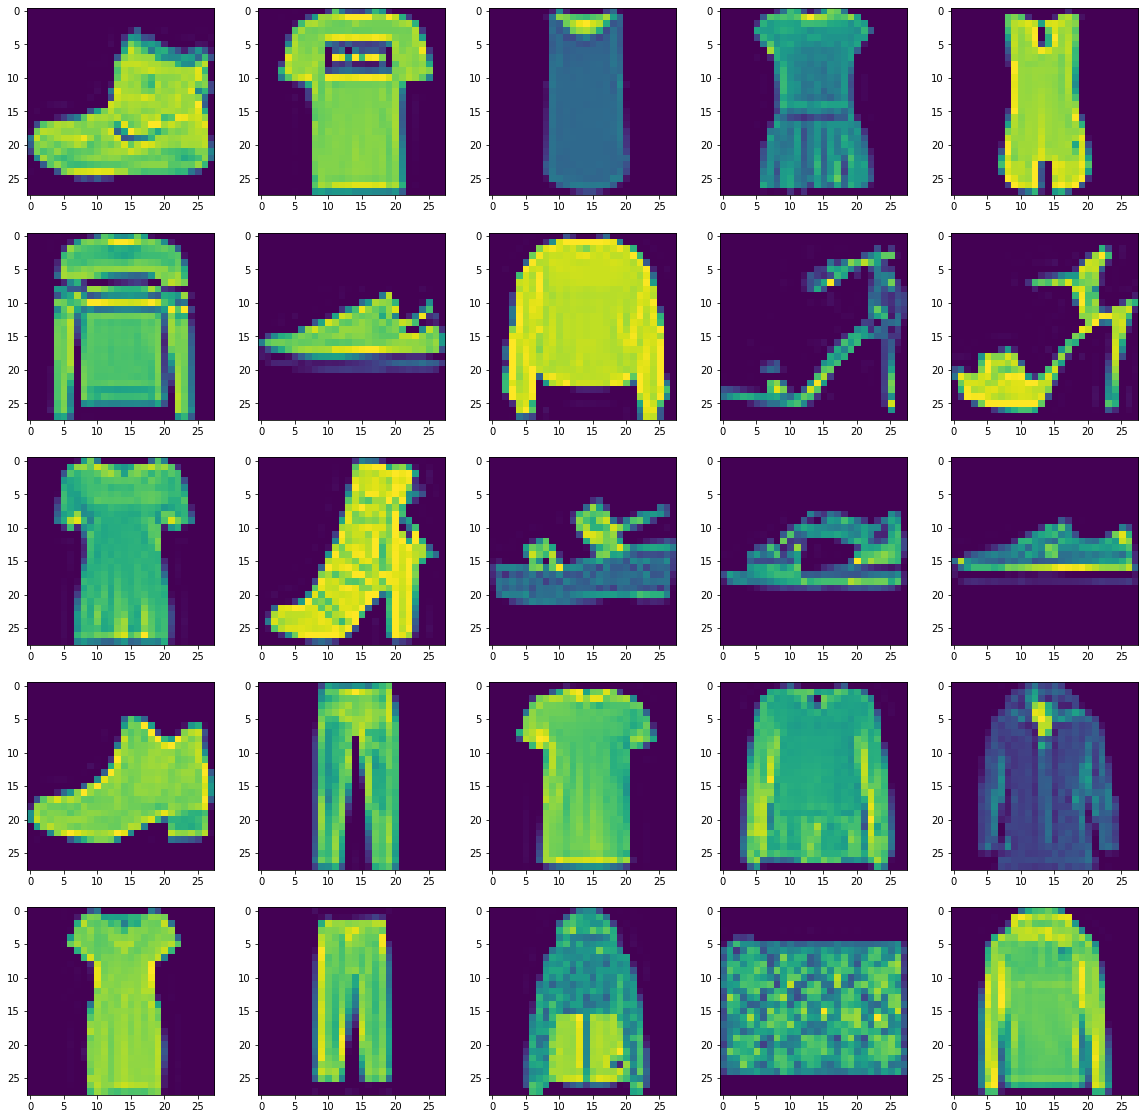

In [48]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
plt.show()

In [49]:
model = tf.keras.models.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPool2D(), 
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [50]:
model

In [51]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [52]:
class_names = ['Koszulka', 'Spodnie', 'Sweter', 'Sukienka', 'Płaszcz', 'Sandały', 'Koszula', 'Sneakersy', 'Torebka', 'Trzewik']

In [53]:
class_names

['Koszulka',
 'Spodnie',
 'Sweter',
 'Sukienka',
 'Płaszcz',
 'Sandały',
 'Koszula',
 'Sneakersy',
 'Torebka',
 'Trzewik']

In [54]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 147s 97ms/step - loss: 0.4703 - accuracy: 0.8281 - val_loss: 0.3702 - val_accuracy: 0.8622
Epoch 2/10
1500/1500 [==============================] - 128s 85ms/step - loss: 0.3075 - accuracy: 0.8879 - val_loss: 0.3171 - val_accuracy: 0.8842
Epoch 3/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2613 - accuracy: 0.9025 - val_loss: 0.2758 - val_accuracy: 0.9010
Epoch 4/10
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2302 - accuracy: 0.9143 - val_loss: 0.2677 - val_accuracy: 0.9020
Epoch 5/10
1500/1500 [==============================] - 73s 49ms/step - loss: 0.2021 - accuracy: 0.9250 - val_loss: 0.2415 - val_accuracy: 0.9135
Epoch 6/10
1500/1500 [==============================] - 121s 81ms/step - loss: 0.1780 - accuracy: 0.9334 - val_loss: 0.2495 - val_accuracy: 0.9121
Epoch 7/10
1500/1500 [==============================] - 119s 80ms/step - loss: 0.1572 - accuracy: 0.9413 - val_loss: 0.26

^prawie 20 minut!!!

In [99]:
def c_plot(x):
    filters, biases = model.layers[x].get_weights()
    layer = model.layers
    print(layer[x].name, filters.shape)
    fig=plt.figure(figsize=(20, 30))
    c=8
    r=8
    n_filters = c * r
    for i in range(1, n_filters+1):
        fig = plt.subplot(r, c, i)
        fig.set_xticks([])
        fig.set_yticks([])
        f = filters[:,:,:,i-1]
        plt.imshow(f[:,:,0], cmap='gray')
    plt.show()

conv2d_2 (3, 3, 1, 64)


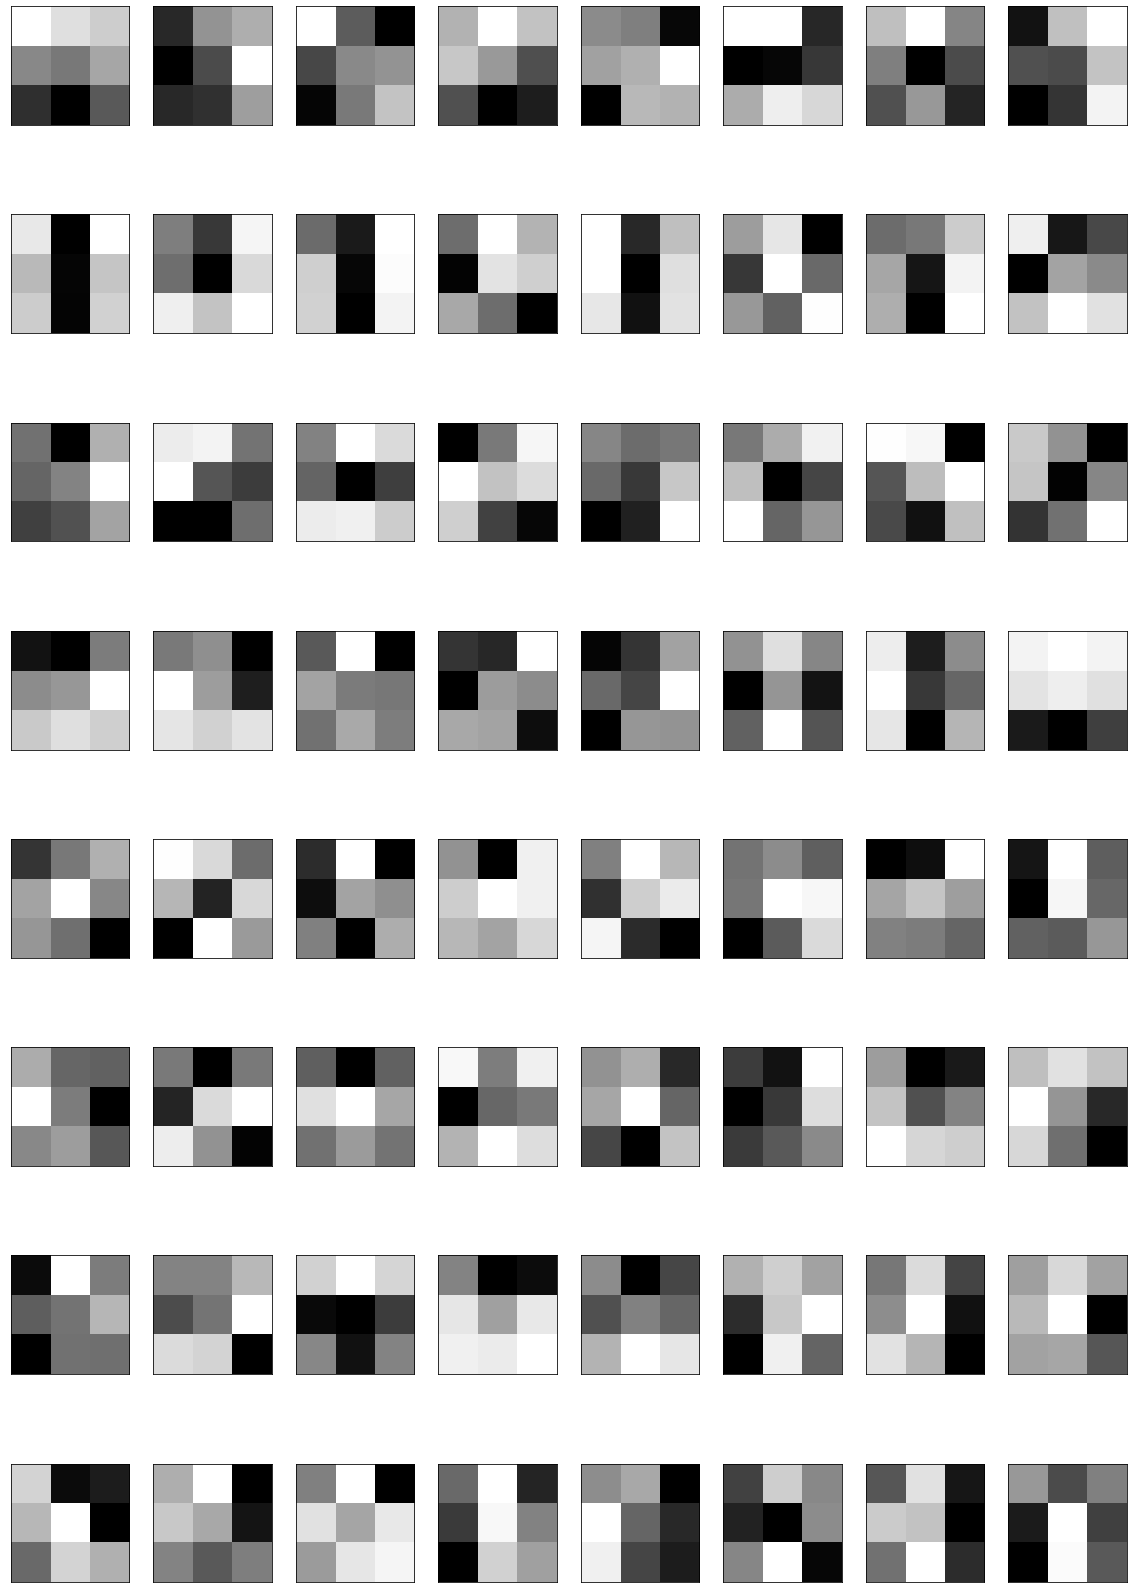

In [100]:
c_plot(0)

conv2d_3 (3, 3, 64, 64)


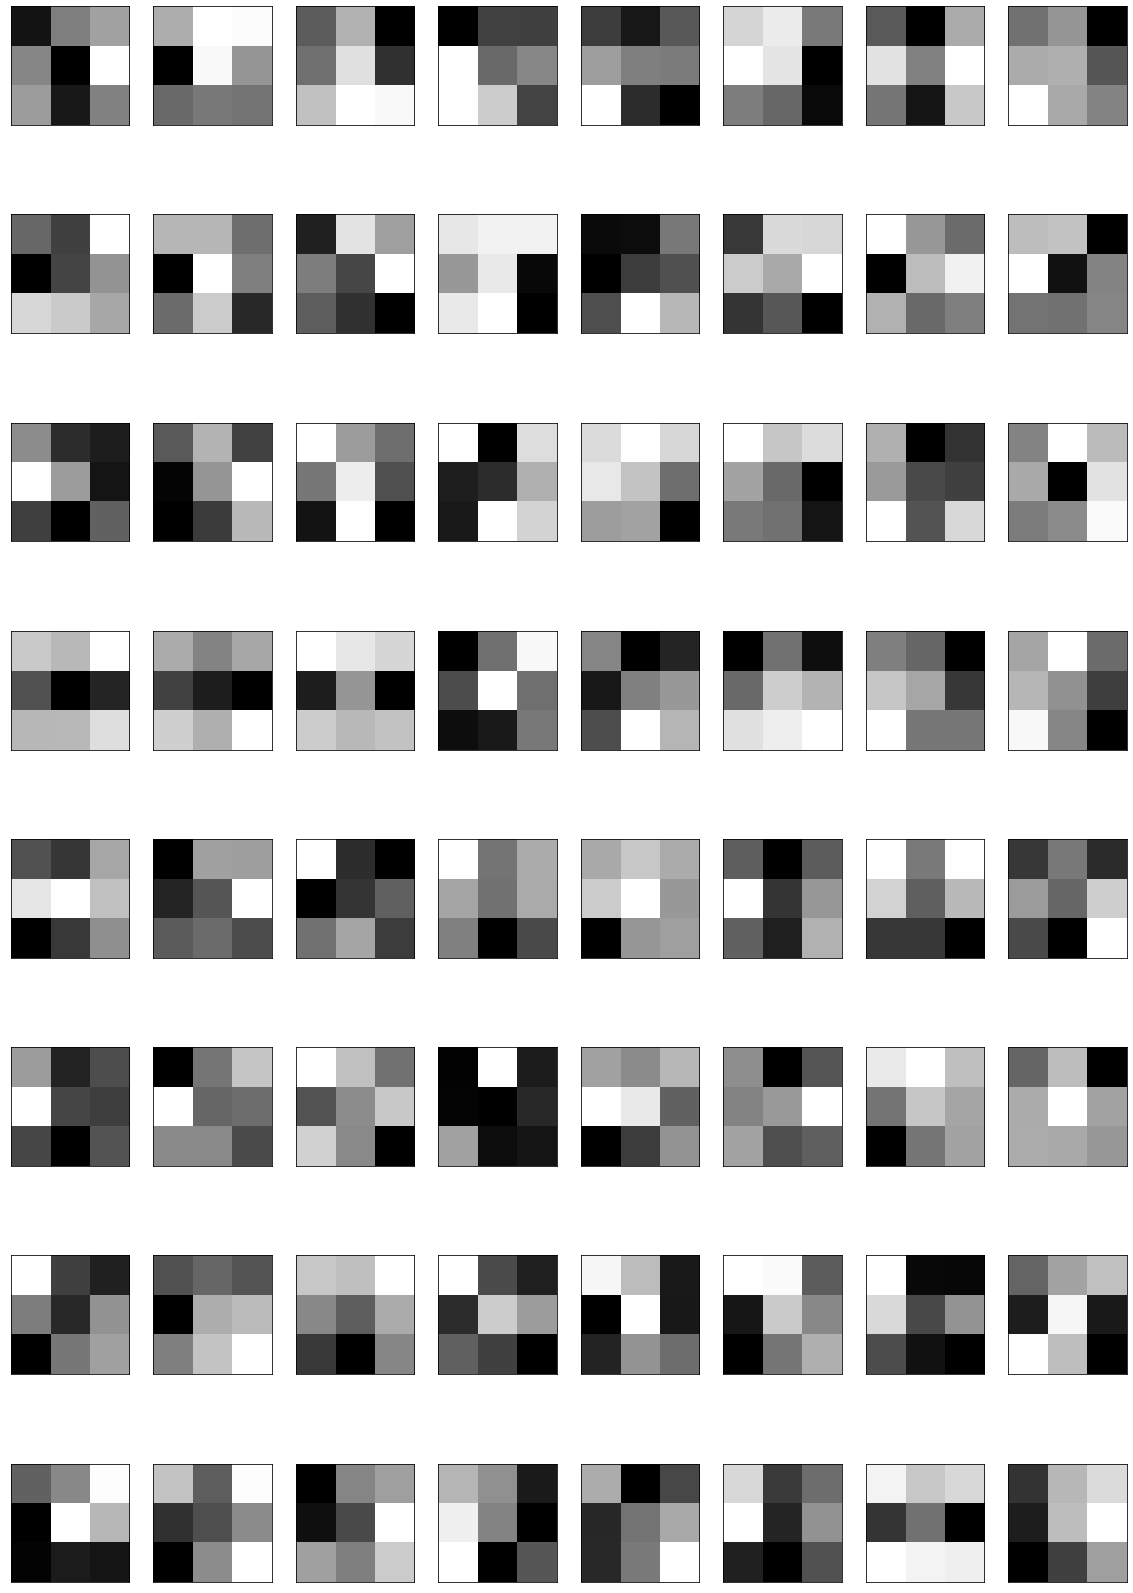

In [101]:
c_plot(2)

In [102]:
from sklearn.metrics import classification_report

In [103]:
predict_x = model.predict(X_test)
classes_x=np.argmax(predict_x, axis=1)
print(classification_report(y_test, classes_x, target_names=class_names))

313/313 [==============================] - 5s 16ms/step
              precision    recall  f1-score   support

    Koszulka       0.83      0.89      0.86      1000
     Spodnie       0.99      0.99      0.99      1000
      Sweter       0.84      0.87      0.85      1000
    Sukienka       0.88      0.95      0.92      1000
     Płaszcz       0.87      0.82      0.85      1000
     Sandały       0.98      0.97      0.98      1000
     Koszula       0.77      0.68      0.72      1000
   Sneakersy       0.95      0.98      0.96      1000
     Torebka       0.97      0.98      0.98      1000
     Trzewik       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [104]:
import plotly.express as px

In [105]:
hist_plot = pd.DataFrame(history.history)
fig = px.line(hist_plot, title='Chart of metrics', markers=True)
fig.show()

1/1 [==============================] - 0s 27ms/step


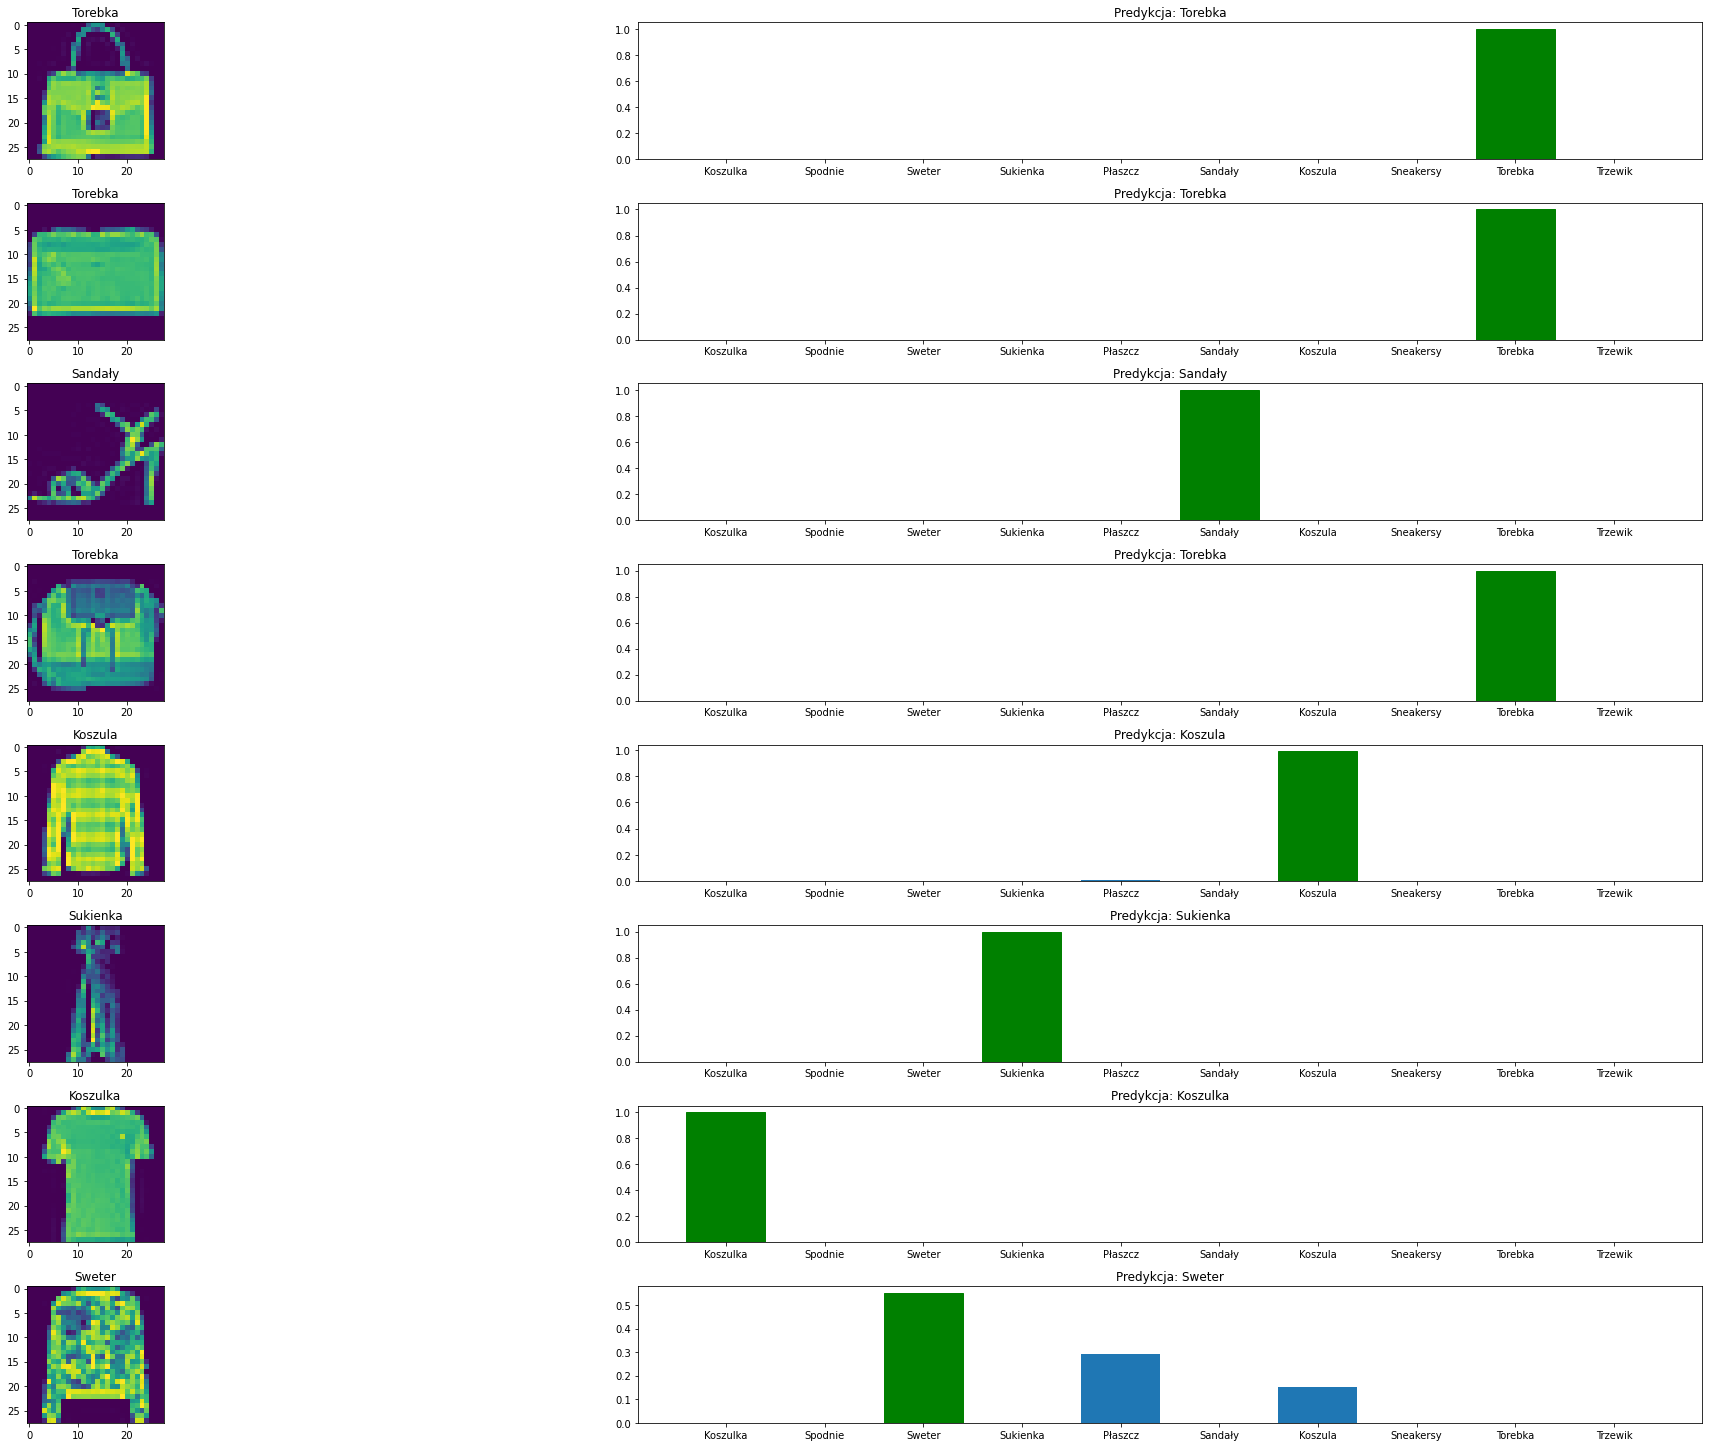

In [108]:
import random
sample = random.sample(range(len(X_test)), 8)

fig = plt.figure(figsize=(30,30))
for i in range(len(sample)):
    index = sample[i]
    predict = model.predict(np.array([X_test[index],])).flatten().tolist()
    plt.subplot(12,2,i*2+1)
    plt.title(class_names[y_test[index]])
    imgplot = plt.imshow(X_test[index])
    plt.subplot(12,2,i*2+2)
    barplot = plt.bar(class_names, predict)
    barplot[y_test[index]].set_color('green')
    plt.title(f'Predykcja: {class_names[predict.index(max(predict))]}')
    fig.tight_layout()

plt.show()